In [25]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from tqdm import tqdm_notebook as tqdm

In [189]:
def phi(x):
    return 1.*(x > 0.)

In [618]:
N_e = 500
N_i = 100

T = int(1e4)

a_ee = np.ones((T))*0.1
b_ee = np.zeros((T,N))

X_e = np.ones((T,N_e))
X_i = np.ones((T,N_i))

W_ee = np.random.rand(N_e,N_e)
W_ie = np.random.rand(N_i,N_e)
W_ei = -np.random.rand(N_e,N_i)
W_ii = -np.random.rand(N_i,N_i)*0.

W_ee[range(N_e),range(N_e)] = 0.
W_ii[range(N_i),range(N_i)] = 0.

d = 1.

eps_a = 1e-4
eps_b = 1e-4

sigm_noise = 1e-1

X_e_target = .1

In [619]:
for t in tqdm(range(1,T)):
    
    noise = np.random.normal(0.,sigm_noise,(N))
    
    X_e[t,:] = phi(a_ee[t-1] * (W_ee @ X_e[t-1,:]) + W_ei @ X_i[t-1,:] + noise - b_ee[t-1,:])
    X_i[t,:] = phi(W_ie @ X_e[t-1,:] + W_ii @ X_i[t-1,:])
        
    pert = np.zeros((N_e))
    pert[np.random.randint(0,N_e)] = ((2.*np.random.rand()>.5)-1.)*d
    X_test = phi(a_ee[t-1] * (W_ee @ (X_e[t-1,:] + pert)) + W_ei @ X_i[t-1,:] + noise)
      
    a_ee[t] = a_ee[t-1] + eps_a * (d**2.- (np.linalg.norm(X_e[t] - X_test)**2.))
    #a_ee[t] = np.maximum(0.,a_ee[t])
    
    b_ee[t,:] = b_ee[t-1,:] - eps_b * (X_e_target - X_e[t-1,:])

<IPython.core.display.Javascript object>


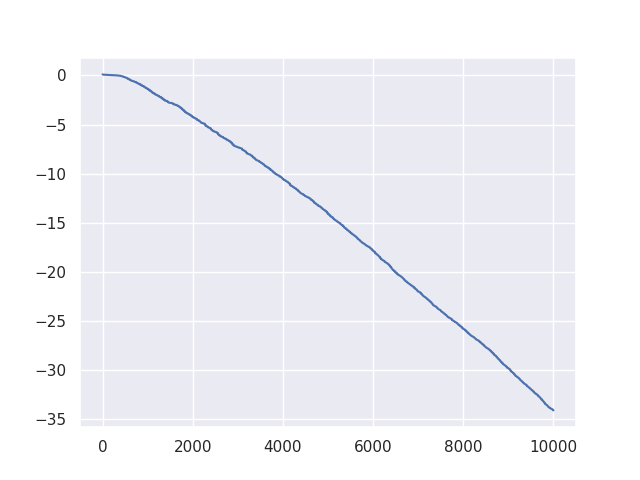

In [620]:
plt.figure()
plt.plot(a_ee)
plt.show()

<IPython.core.display.Javascript object>


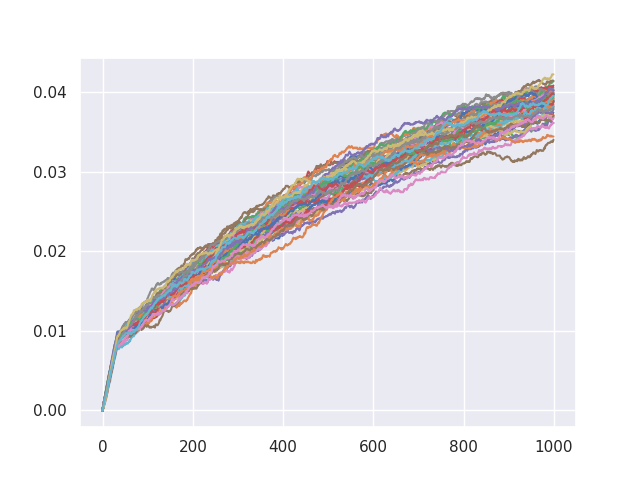

In [621]:
plt.figure()
plt.plot(b_ee[::10,:50])
plt.show()

<IPython.core.display.Javascript object>


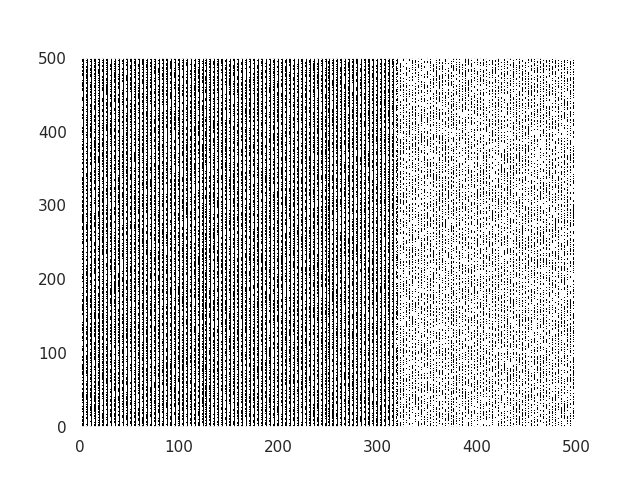

In [622]:
plt.figure()
plt.pcolormesh(1.-X_e[:500,:].T,cmap='gray')
plt.show()